# Gradient descent

$X \sim \mathcal{U}(0,1)$

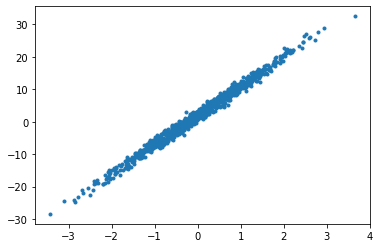

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

samples = 1000
X = np.random.randn(samples,1)
noise = np.random.randn(samples,1)
y = 2 + 9*X + noise 
plt.plot(X,y,'.')

In [9]:
X = np.c_[np.ones(samples), X]

X[:5]

array([[ 1.        , -1.11142106],
       [ 1.        , -1.24459304],
       [ 1.        ,  0.10173191],
       [ 1.        , -1.60575548],
       [ 1.        , -0.16298333]])

## Train|test split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 2), (330, 2), (670, 1), (330, 1))

In [11]:
def gradient_descent(X,y,learning_rate=.1, iterations=100):
    m = len(X)

    theta = np.random.randn(X.shape[1],1) 

    for _ in range(iterations):
        gradient = 2/m* X.T @ (X @ theta - y)

        theta -= learning_rate*gradient

    return theta

theta = gradient_descent(X_train, y_train)
theta.reshape(-1)


array([2.00398656, 9.01337659])

In [17]:
epochs = np.arange(1,200)

thetas = np.array([gradient_descent(X_train, y_train, iterations = epoch).reshape(-1) for epoch in epochs])
thetas.shape

(199, 2)

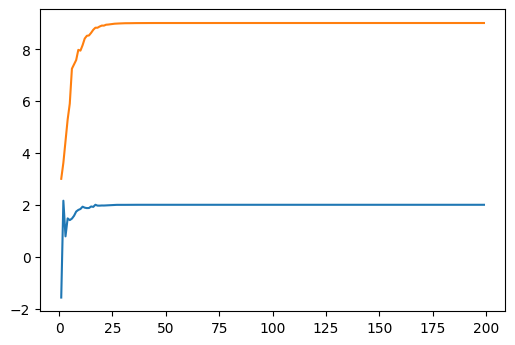

In [18]:
fig, ax = plt.figure(dpi=100), plt.axes()
ax.plot(epochs, thetas)

# Stochastic gradient descent (SGD)

In [ ]:
epochs = 10
t0,t1 = 5,50

def learning_rate_schedule(t):
    """ Decrease learning rate as training progresses"""

    return t0/(t+t1)

theta = np.random.randn(2,1)
m = len(X_train)

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        x_i = X_train[random_index:random_index+1]
        y_i = y_train[random_index:random_index+1]
        gradients = 2*x_i.T.dot(x_i.dot(theta)- y_i) 
        eta = learning_rate_schedule(epoch*m +i) 
        theta -= eta*gradients

theta


array([[1.99543637],
       [9.02345378]])